In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy as scp;
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation

In [3]:
data = np.loadtxt("../Data/Rust_Runs/broad_wavepacket_with_TOF/test_with_tof2.txt", delimiter=',', dtype=np.complex64);
time = data[:,2].astype(np.float64);
dt = time[2]-time[1];
data_subtracted=data[:, 4:]
np.shape(data_subtracted)

/tmp/ipykernel_5148/3048011208.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  time = data[:,2].astype(np.float64);


(11202, 1793)

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_5148/3275724859.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/tmp/ipykernel_5148/3275724859.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$p(\hbar k_L)$")


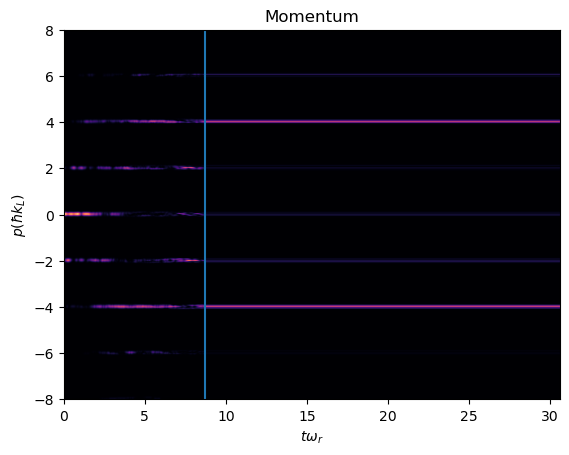

In [6]:
plt.imshow(np.square(np.abs(data_subtracted)).T, cmap = "magma", extent = [ time[0],time[-1], -16/2,16/2 ,],origin="lower",aspect = "auto")
plt.grid(False)
plt.title("Momentum")
plt.xlabel("$t\omega_r$")
plt.ylabel("$p(\hbar k_L)$")
y = np.arange(-8,9)
plt.plot(np.ones(len(y))*32*np.pi/11.5, y)


## FFT STYLE 1

In [ ]:
myfft = np.array([scp.fft.fft( data_subtracted[n,:]) for n in range(len(data_subtracted))])

In [ ]:
x_val=np.square(np.abs(myfft))

In [ ]:
plt.imshow(x_val.T, cmap="magma", aspect="auto")

In [ ]:
halfway = int((len(x_val[:,0])-1)/2)
halfway

In [ ]:
x_reshaped = np.concatenate( (x_val[:,halfway:], x_val[:,0:halfway+1]), axis=1 )

In [ ]:
plt.imshow(x_val[:, halfway:-1], cmap="magma", aspect="auto")

In [ ]:
plt.imshow(x_val[:,0:halfway+1], aspect = "auto")

## FFT STYLE 2

In [7]:
halfway = int((len(data_subtracted[0,:])-1)/2)
halfway
p_reshaped = np.concatenate( (data_subtracted[:,halfway:], data_subtracted[:,0:halfway+1]), axis=1 )
myfft = np.array([scp.fft.fft(p_reshaped[n]) for n in range(len(data_subtracted))])
myfft_reshaped=np.concatenate( (myfft[:,halfway:], myfft[:,0:halfway+1]), axis=1 )
temp = np.square(np.abs(myfft_reshaped));
myfft_reshaped_rescaled = np.array ( [ temp[m,:]/np.sum(temp[m,:])    for m in range(len(myfft_reshaped)) ] )

In [8]:
halfway = int((len(data_subtracted[0,:])-1)/2)
halfway
p_reshaped = np.concatenate( (data_subtracted[:,halfway+1:], data_subtracted[:,0:halfway+1]), axis=1 )
myfft = np.array([scp.fft.fft(p_reshaped[n]) for n in range(len(data_subtracted))])
myfft_reshaped=np.concatenate( (myfft[:,halfway:], myfft[:,0:halfway+1]), axis=1 )
temp = np.square(np.abs(myfft_reshaped));
myfft_reshaped_rescaled = np.array ( [ temp[m,:]/np.sum(temp[m,:])    for m in range(len(myfft_reshaped)) ] )

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5148/515186539.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/tmp/ipykernel_5148/515186539.py:22: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Amplitude $A$ of $\phi = A\sin\omega t$")
/tmp/ipykernel_5148/515186539.py:23: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t(\omega_R^{-1})$")
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values 

8.741823036075946


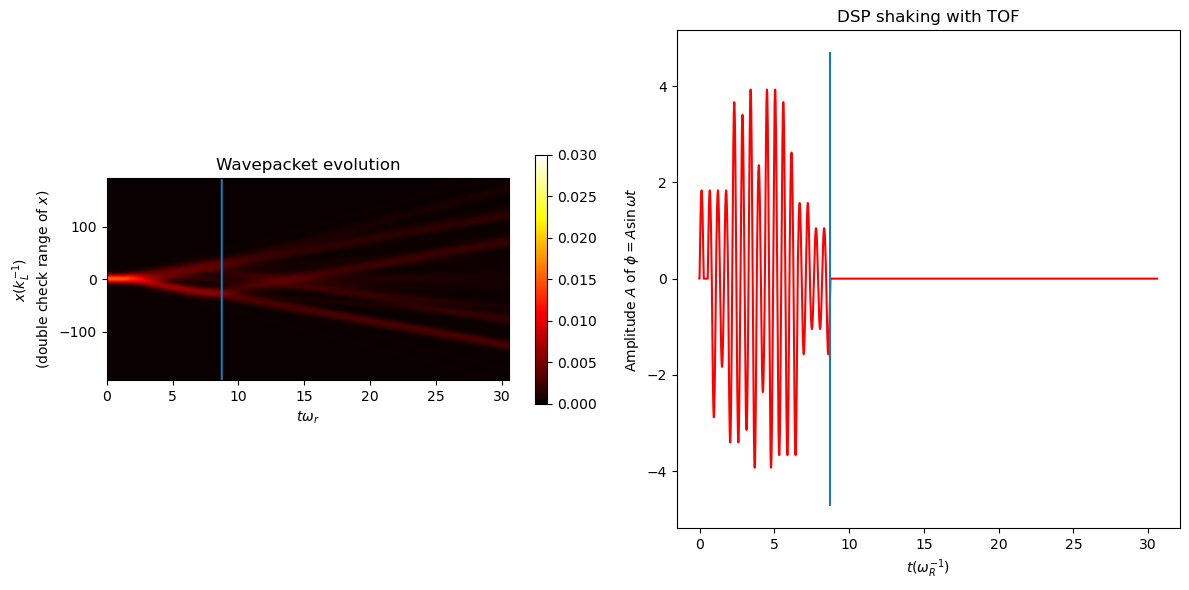

In [9]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
im=plt.imshow(myfft_reshaped_rescaled.T, cmap="hot",aspect="0.04", vmax = 0.03, extent=[data[0,2],data[-1,2], -96*2, 96*2])
ax = plt.gca()
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="25%", pad=0.1)
#plt.colorbar(im, cax=cax)
plt.colorbar(shrink = 0.5)

plt.xlabel("$t\omega_r$")
plt.ylabel("$x (k_L^{-1})$ \n(double check range of $x$)")
plt.title("Wavepacket evolution")
print( 32*np.pi/11.5)
y = np.arange(-96*2,96*2,0.1);
plt.plot(np.ones(len(y))*32*np.pi/11.5, y)


plt.subplot(122)
plt.plot(data[:,2],data[:,3], color= "red")
plt.title("DSP shaking with TOF")
plt.ylabel("$\phi(t) = A\sin\omega t$") 
plt.xlabel("$t(\omega_R^{-1})$")
y2 = np.arange(-1.5*np.pi,1.5*np.pi,0.1);
plt.plot(np.ones(len(y2))*32*np.pi/11.5, y2)
plt.tight_layout()

MovieWriter ffmpeg unavailable; using Pillow instead.


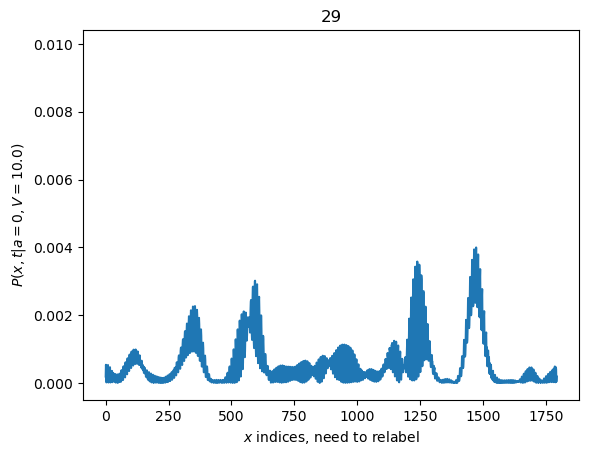

In [10]:
time_to_plot = 17.5 ; # im omega_R inverse
time_index_to_plot = int(9/dt)

fig, ax = plt.subplots();
# animation function. This is called sequentially
image = ax.plot( myfft_reshaped_rescaled[time_index_to_plot, :])[0]
frame_step = 200;
def update(n):
    image.set_ydata( myfft_reshaped_rescaled[time_index_to_plot + frame_step*n, :])
    current_time_stamp =  (n*frame_step + time_index_to_plot)*dt;
    image.axes.set_title(str(int(current_time_stamp)))   
    image.axes.set_xlabel("$x$ indices, need to relabel")
    image.axes.set_ylabel("$P(x,t|a=0,V=10.0)$")
    return (image)
    
ani = animation.FuncAnimation(fig=fig, func=update, frames=int ( (len(time)- time_index_to_plot)/frame_step ), interval=500)
ani.save("animation of time of flight2_shiftedhalfway.gif")
plt.show()

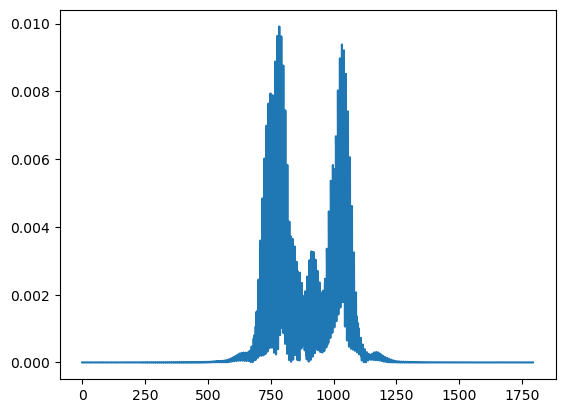

In [12]:
plt.plot( myfft_reshaped_rescaled[time_index_to_plot, :])
